In [1]:
import Models.SIRD as sird
import Models.SIRD_Time as sird_time
import Models.SIRD_Beta_Time as sird_beta

import Models.SAIRD as saird
import Models.SAIRD_Time as saird_time

import Models.SIRD_Feedback as sird_fb

import Models.process as process

import numpy as np
import csv
import matplotlib.pyplot as plt
import platform

In [2]:
pathc = "../Data/Italian Data/"
#pathc="../Data/Covid Tracking State Data/"
if platform.system() == "Windows":
    pathc.replace("/", "\\")
    
filename = "National Data.csv"
#filename = "CA.csv"
dates, infectRaw, recovRaw, deadRaw = process.loadData(pathc + filename)

#recovRaw = process.getRecov(infectRaw, deadRaw)
#infectRaw = process.getCurrentInfect(infectRaw, recovRaw, deadRaw)

pop = 60000000

skipDays = 0
numDays = len(infectRaw) #just to get initial beginning data
#asympt = asymptRaw[skipDays:numDays]
infect = infectRaw[skipDays:numDays]
recov = recovRaw[skipDays:numDays] 
dead = deadRaw[skipDays:numDays]

## SIRD and SIRD time varying model

In [10]:
sird.weightDecay = .9
sird.regularizer = 10

In [11]:
q = sird.getQ(infect,recov, dead, pop)
print("q =", q)

q = 0.28347682083333337


In [6]:
#q=.011
susceptRaw = process.getSuscept(infectRaw,recovRaw,deadRaw, q,pop)
suscept = susceptRaw[skipDays:numDays]

[0.01954255970949455, 0.03184124275590204, 0.0008564566779093093]


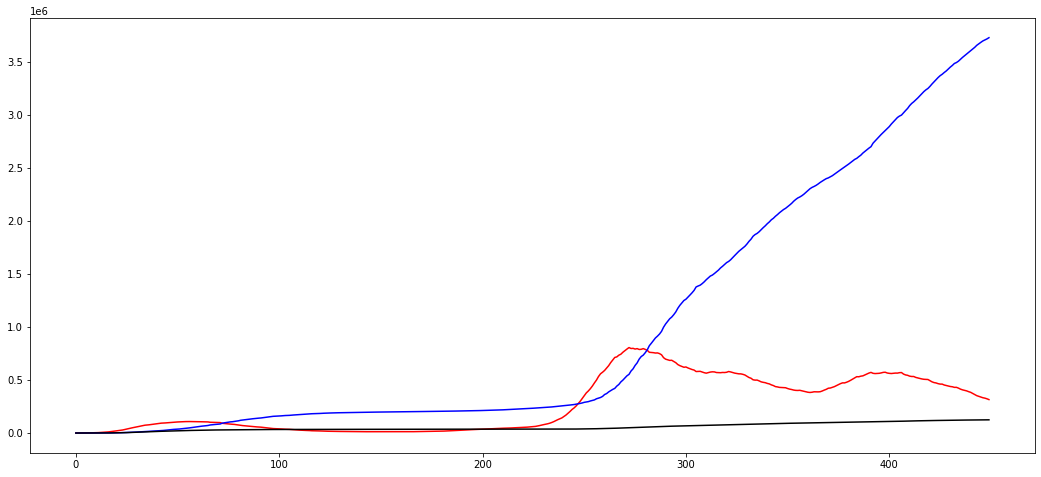

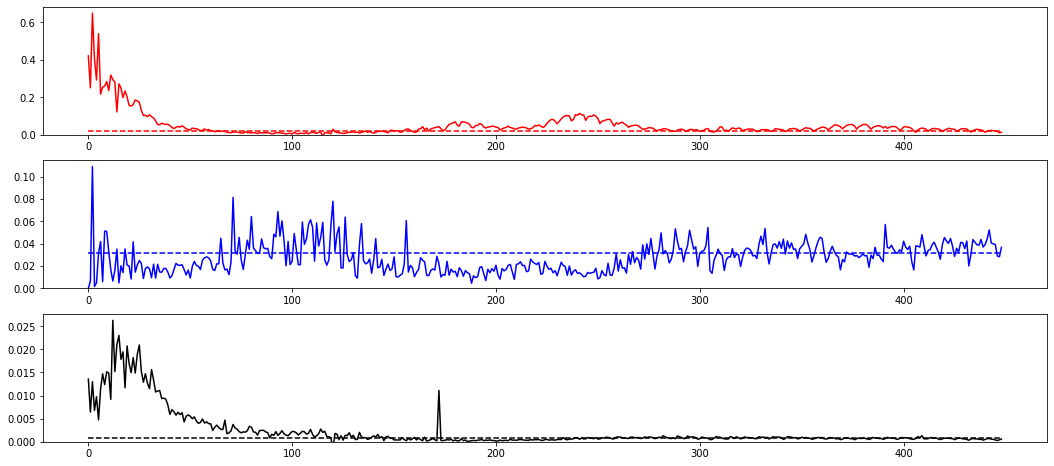

In [7]:
fig,ax = sird.displayData(suscept, infect, recov, dead, graphVals=[0,1,1,1])

linVars = sird.getLinVars(suscept, infect, recov, dead)
print(linVars)

linVarsTime, fig, ax = sird_time.getLinVars(suscept, infect, recov, dead, graph=True)

ax[0].plot(np.ones(len(linVarsTime[:,0]))*linVars[0], color="red", linestyle="dashed")
ax[1].plot(np.ones(len(linVarsTime[:,1]))*linVars[1], color="blue", linestyle="dashed")
ax[2].plot(np.ones(len(linVarsTime[:,2]))*linVars[2], color="black", linestyle="dashed")

Lin Vars: [0.02870613 0.03756927 0.00084453]
Lin Vars: [0.025726103553382333, 0.030614320818075597, 0.0009286756945379536]


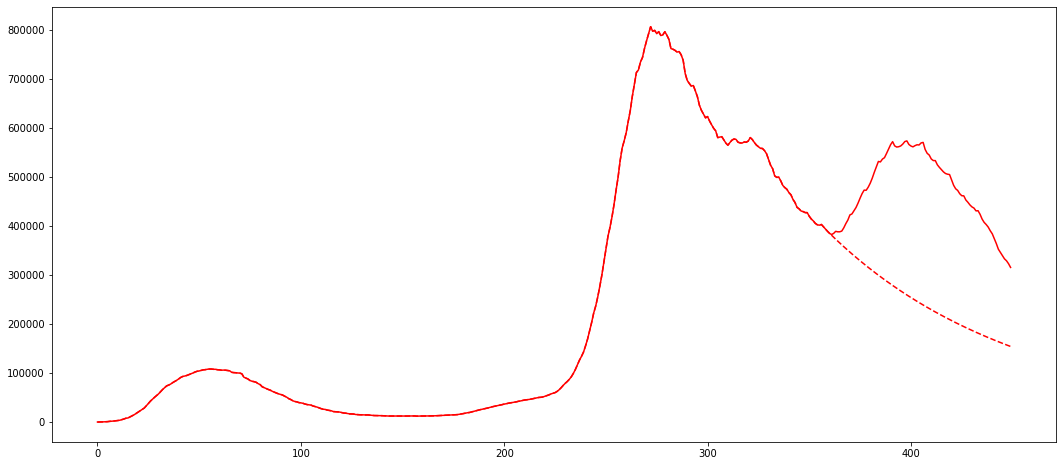

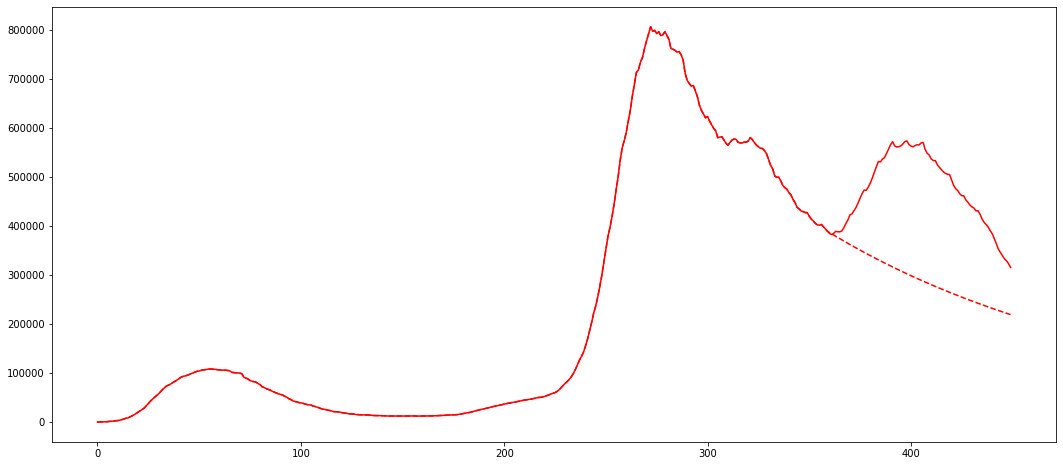

In [8]:
daysToPredict = 90
sird_time.predictMatch(suscept, infect, recov, dead, daysToPredict, graphVals=[0,1,0,0]);
sird.predictMatch(suscept, infect, recov, dead, daysToPredict, graphVals=[0,1,0,0]);

## SIRD Beta time varying

Same as SIRD but Beta is time varying while gamma and nu are constant

In [9]:
sird_beta.weightDecay = .9
sird_beta.regularizer = 10

In [10]:
q = sird_beta.getQ(infect,recov, dead, pop, resol=100)
print("q =", q)

q = 0.28347682083333337


In [11]:
#q=.011
susceptRaw = process.getSuscept(infectRaw,recovRaw,deadRaw, q,pop)
suscept = susceptRaw[skipDays:numDays]

[0.01954255970949455, 0.03184124275590204, 0.0008564566779093093]


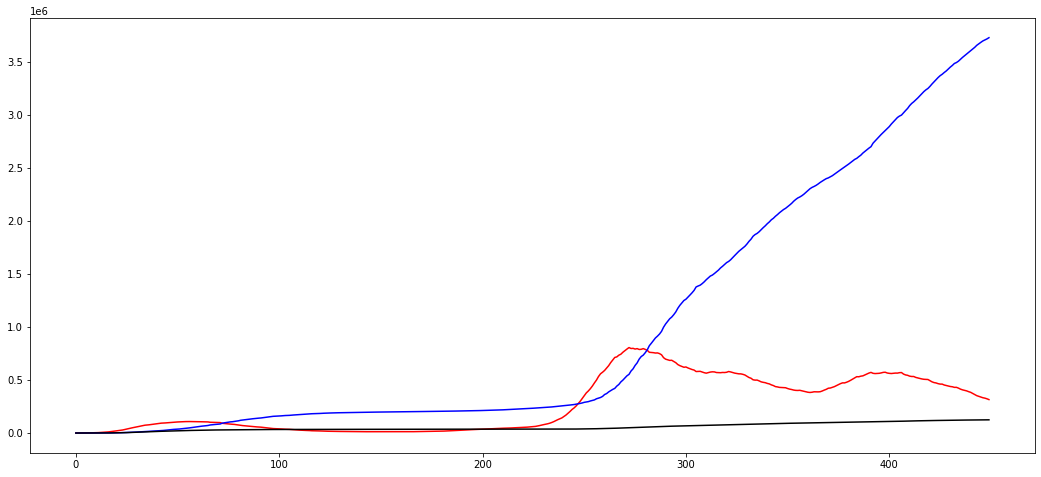

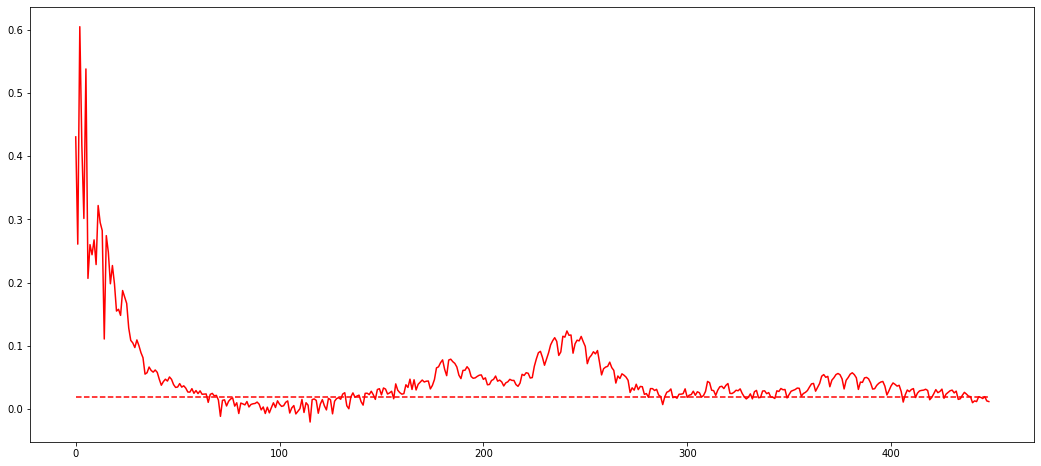

In [12]:
fig,ax = sird_beta.displayData(suscept, infect, recov, dead, graphVals=[0,1,1,1])

linVars = sird.getLinVars(suscept, infect, recov, dead)
print(linVars)

linVarsTime, fig, ax = sird_beta.getLinVars(suscept, infect, recov, dead, graph=True)

ax.plot(np.ones(len(linVarsTime[0]))*linVars[0], color="red", linestyle="dashed")

Lin Vars: [0.02517572186154781, 0.030614320818075597, 0.0009286756945379536]


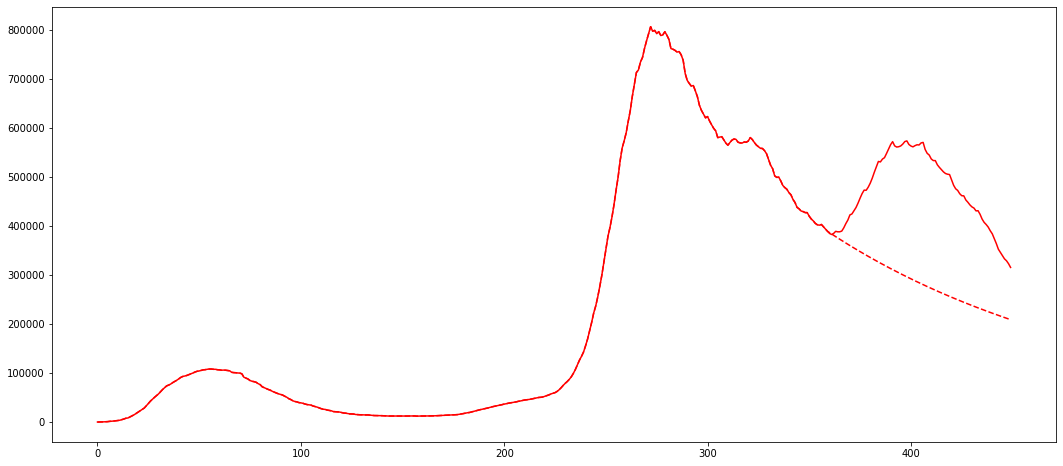

In [13]:
daysToPredict = 90
sird_beta.predictMatch(suscept, infect, recov, dead, daysToPredict, graphVals=[0,1,0,0]);

## SAIRD and SAIRD time model

In [20]:
saird.weightDeacy = .9
saird.regularizer = 10

In [21]:
asymptRaw = saird.getAsympt(infectRaw, shift=5)
asympt = asymptRaw[skipDays:numDays]

In [22]:
q = saird.getQ(asympt,infect,recov, dead, pop)
print("q =", q)

#q=.24
susceptRaw = saird.getSuscept(asymptRaw,infectRaw,recovRaw,deadRaw, q,pop)
suscept = susceptRaw[skipDays:numDays]

q = 0.28347682083333337


[0.03445662297612622, 0.03302324475153517, 0.03184124275590204, 0.0008564566779093093]


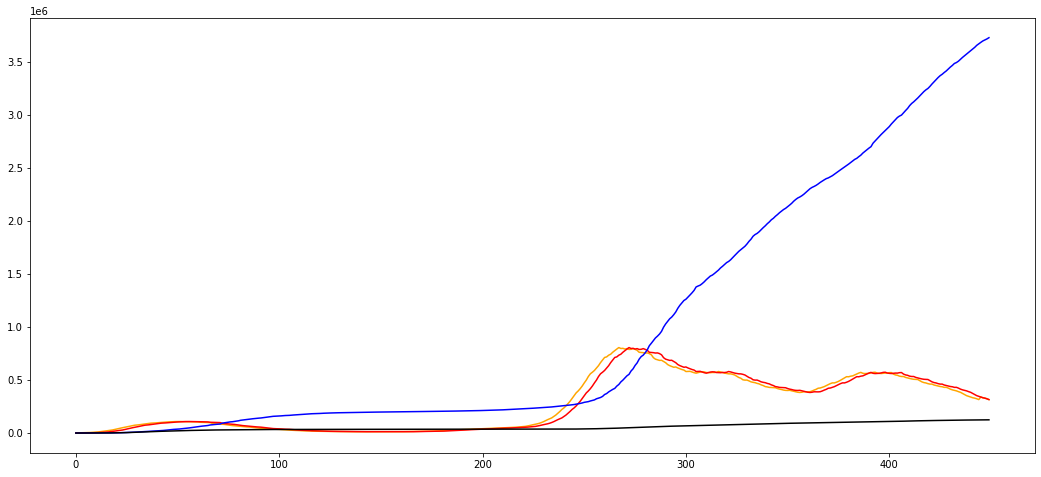

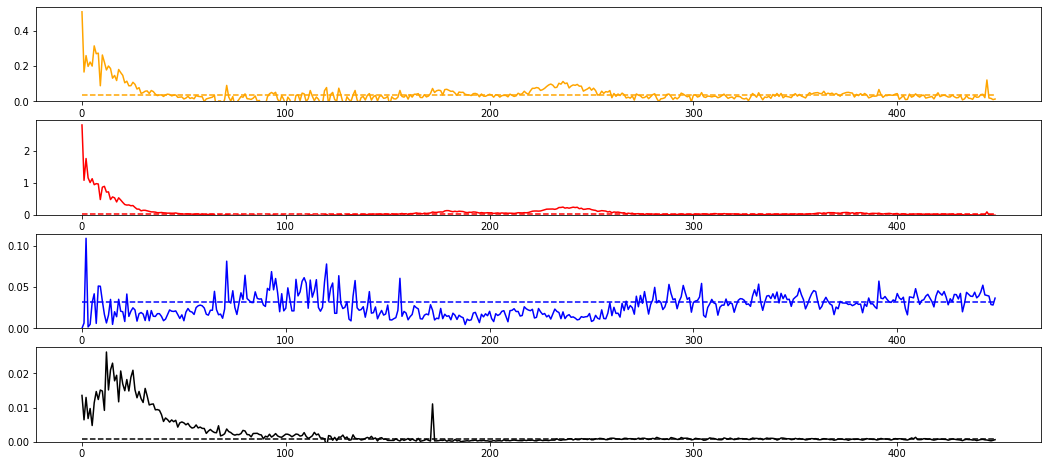

In [23]:
fig,ax = saird.displayData(suscept, asympt, infect, recov, dead, graphVals=[0,1,1,1,1])

linVars = saird.getLinVars(suscept, asympt, infect, recov, dead)
print(linVars)

linVarsTime, fig, ax = saird_time.getLinVars(suscept, asympt, infect, recov, dead, graph=True)

ax[0].plot(np.ones(len(linVarsTime[:,0]))*linVars[0], color="orange", linestyle="dashed")
ax[1].plot(np.ones(len(linVarsTime[:,1]))*linVars[1], color="red", linestyle="dashed")
ax[2].plot(np.ones(len(linVarsTime[:,2]))*linVars[2], color="blue", linestyle="dashed")
ax[3].plot(np.ones(len(linVarsTime[:,3]))*linVars[3], color="black", linestyle="dashed")

Lin Vars: [0.02802879 0.01795099 0.03556671 0.00089315]
Lin Vars: [0.037369795931096336, 0.033561233504494255, 0.03097041854643367, 0.0008842515840881842]


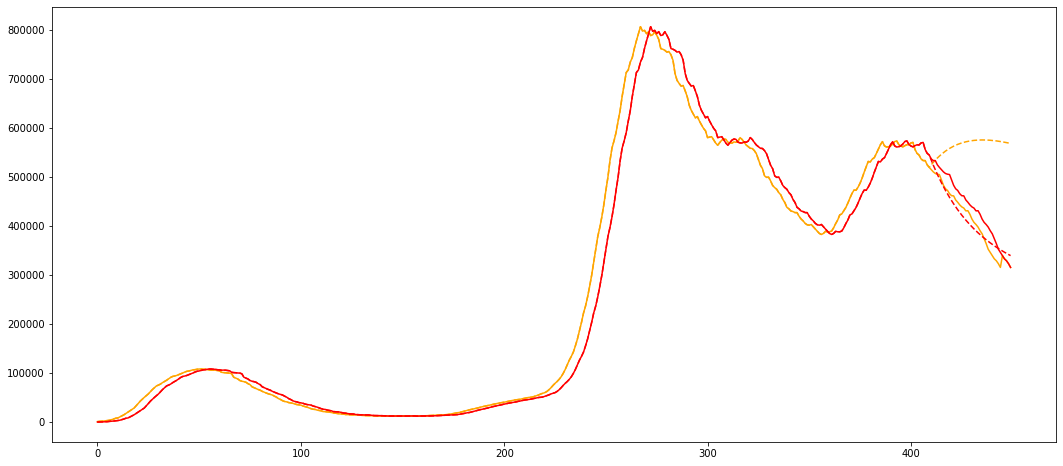

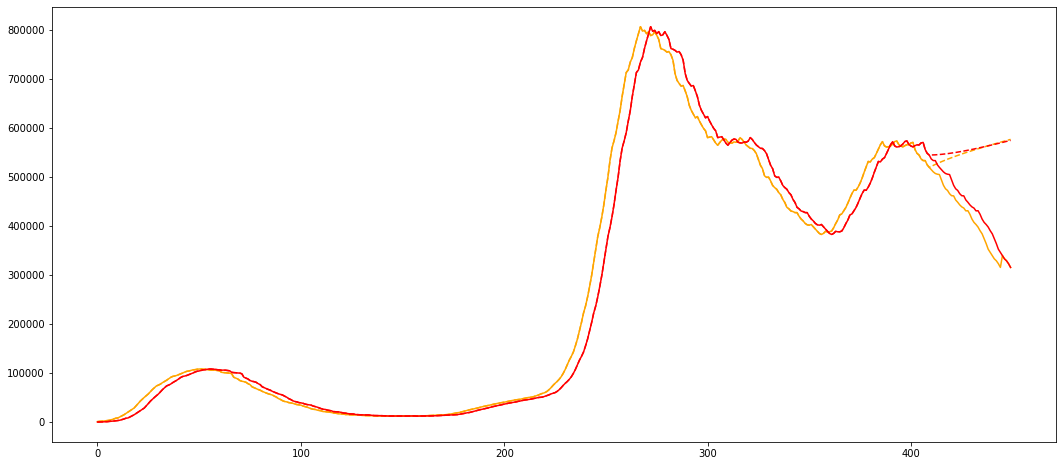

In [27]:
daysToPredict = 40
saird_time.predictMatch(suscept, asympt, infect, recov, dead, daysToPredict, graphVals=[0,1,1,0,0]);
saird.predictMatch(suscept, asympt, infect, recov, dead, daysToPredict, graphVals=[0,1,1,0,0]);

## SIRD Feedback (no delay)

In [3]:
sird_fb.weightDeacy = .9
sird_fb.regularizer = 10

In [4]:
q = sird.getQ(infect,recov, dead, pop) #use non feedback model to get q value, should be accurate enough
print("q =", q)

#q=.24
susceptRaw = process.getSuscept(infectRaw,recovRaw,deadRaw, q,pop)
suscept = susceptRaw[skipDays:numDays]

q = 0.28347682083333337


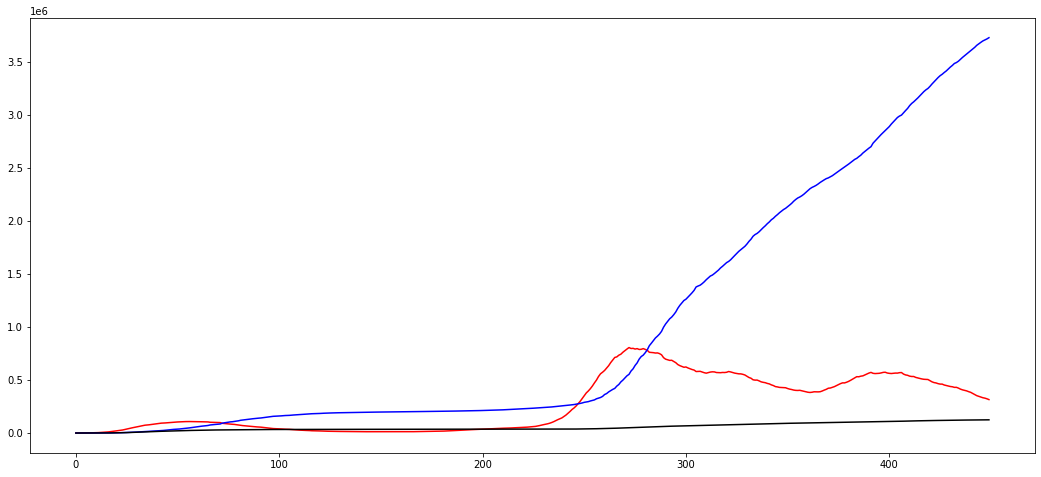

In [5]:
fig,ax = sird_fb.displayData(suscept, infect, recov, dead, graphVals=[0,1,1,1])

In [12]:
b1Range = (0, 5000)
b2Range = (1, 5)

betaVarsResol = [100, 5]

linVars, nonLinVars = sird_fb.solveAllVars(suscept, infect, recov, dead, [b1Range, b2Range], betaVarsResol, printOut=True)

Solution: 
b0:  0.03141103128131004
b1:  0.02432150607056574
g:   0.03184124275590204
nu:  0.0008564566779093093
b2:  50.0
b3:  4.6
cost:  89802178.96855086



In [7]:
sirdLinVars = sird.getLinVars(suscept, infect, recov, dead)
print("cost: ", sird.getError(suscept, infect, recov, dead, sirdLinVars))

cost:  93465221.82584646


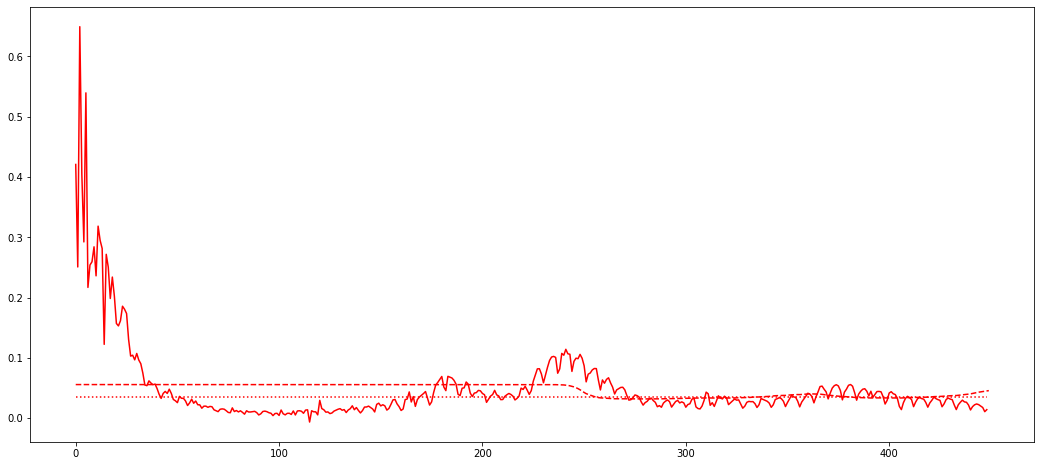

In [14]:
betaTime = sird_fb.getBetaTime(suscept, infect, recov, dead, linVars, nonLinVars)
linVarsTime = sird_time.getLinVars(suscept, infect, recov, dead)
linVarsConst = sird.getLinVars(suscept, infect, recov, dead)


fig, ax = plt.subplots(figsize=(18,8))
ax.plot(np.ones(len(linVarsTime[:,0]))*linVarsConst[0], color="red", linestyle="dotted") #constant beta
ax.plot(betaTime, color="red", linestyle="dashed") #feedback beta
ax.plot(linVarsTime[:,0], color="red") #time varying beta

Lin Vars: [0.03480937923531224, 0.030350499624225008, 0.000934069659246595]
Non Lin Vars: [50.0, 9.0]
Lin Vars: [0.03277286858962348, 0.041851189667009264, 0.030350499624225008, 0.000934069659246595]


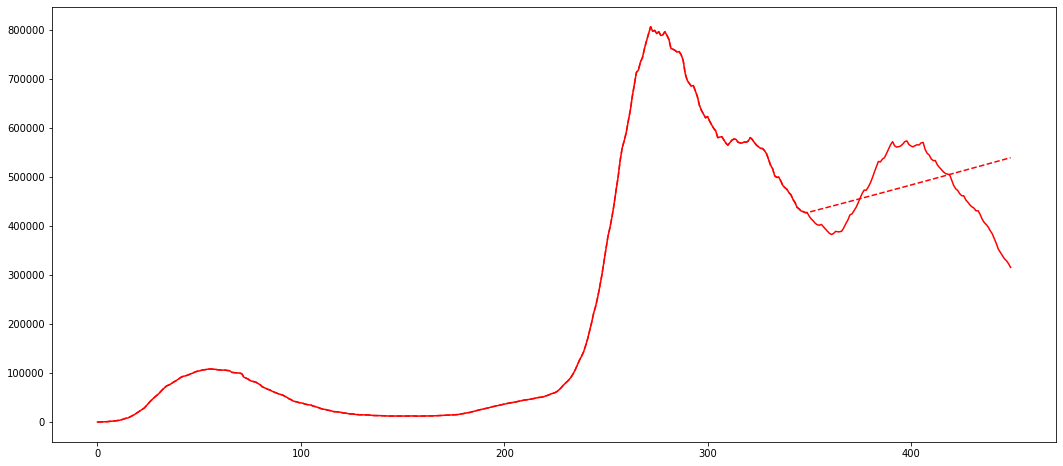

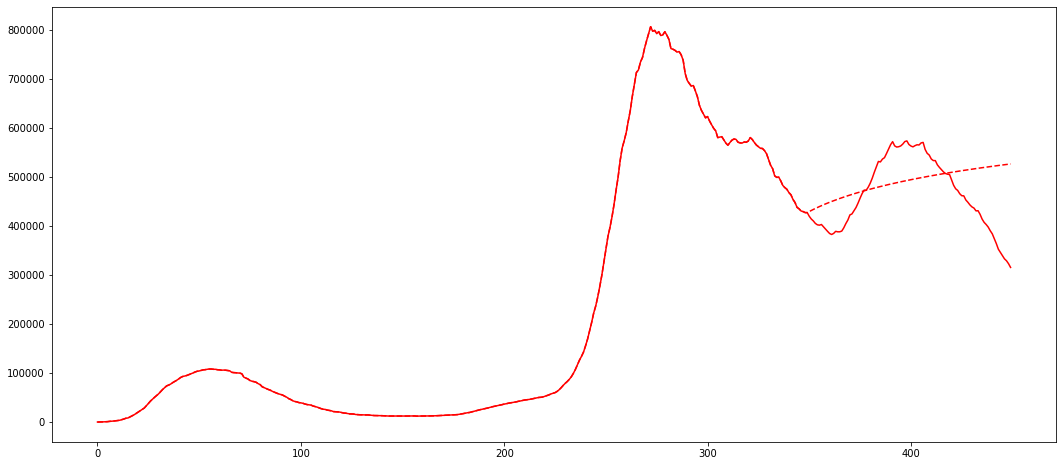

In [6]:
daysToPredict = 100
sird.predictMatch(suscept, infect, recov, dead, daysToPredict, graphVals=[0,1,0,0]);
sird_fb.predictMatch(suscept, infect, recov, dead, daysToPredict, graphVals=[0,1,0,0]);

In [28]:
#to do: IRD.feedback, IRD.feedback_delay, SIRD.feedback_delay, AIRD.feedback, SAIRD.feedback


In [17]:
varConstraints = [(0,5), (0,5)]
varResol = [2, 5]
varSteps = [3, 1]


currentVars = [varConstraints[0][0], varConstraints[1][0]]

continueLoop = True
while(continueLoop):
    
    print(currentVars)
    currentVars[0] = currentVars[0]+varSteps[0]
    
    varIndex = 0
    while(currentVars[varIndex] > varConstraints[varIndex][1]):
        currentVars[varIndex] = varConstraints[varIndex][0]
        varIndex = varIndex + 1
        currentVars[varIndex] = currentVars[varIndex]+varSteps[varIndex]






[0, 0]
[3, 0]
[0, 1]
[3, 1]
[0, 2]
[3, 2]
[0, 3]
[3, 3]
[0, 4]
[3, 4]
[0, 5]
[3, 5]


IndexError: list index out of range

In [8]:
#import SAIRD_Feedback as SAIRD_fm
import SIRD_Model as sird
import SIRD_Feedback_Delay as sird_fb_delay

import numpy as np
import csv
import matplotlib.pyplot as plt
import platform

In [10]:
sird_fb_delay.regularizer = 10
sird_fb_delay.weightDecay = .9

sird_fb_delay.delay = 21

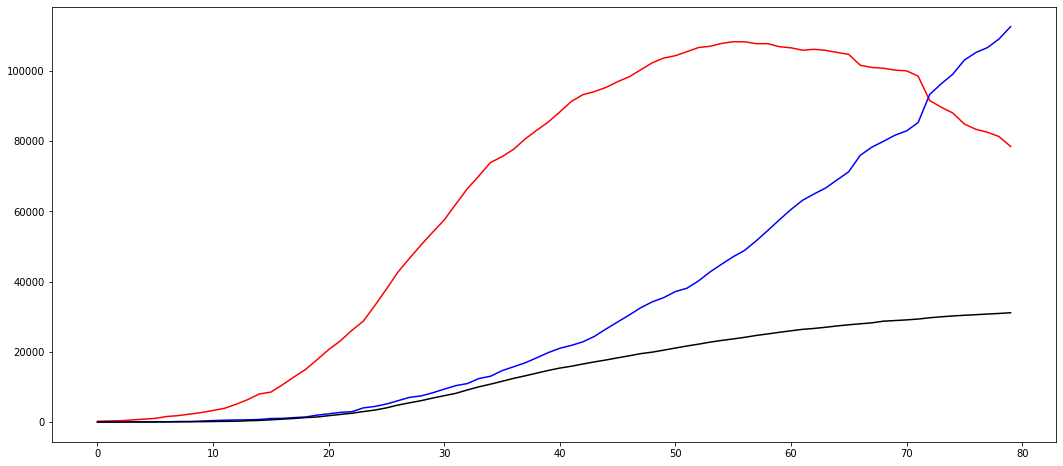

In [7]:
pathc = "../Data/Italian Data/"
#pathc="../Data/Covid Tracking State Data/"
if platform.system() == "Windows":
    pathc.replace("/", "\\")
    
filename = "National Data.csv"
#filename = "AZ.csv"
dates, infectRaw, recovRaw, deadRaw = sird.loadData(pathc + filename)
#recovRaw = SIRD_Model.approxRecovered(infectRaw, deadRaw)
#infectRaw = infectRaw - deadRaw - recovRaw

#set up day range
pop = 60000000 #for italy
skipDays = 0
numDays = 80 #len(infectRaw) #just to get initial beginning data
daysToPredict = 45
#asympt = asymptRaw[skipDays:numDays]
infect = infectRaw[skipDays:numDays]
recov = recovRaw[skipDays:numDays] 
dead = deadRaw[skipDays:numDays]


fig, ax = plt.subplots(figsize=(18,8))
ax.plot(infect, "red")
ax.plot(recov, "blue")
ax.plot(dead, "black")

[0.0173213892619152, 0.017321389261915208, 0.022448121461986197, 0.005241644359216902]
5771055.3303699875


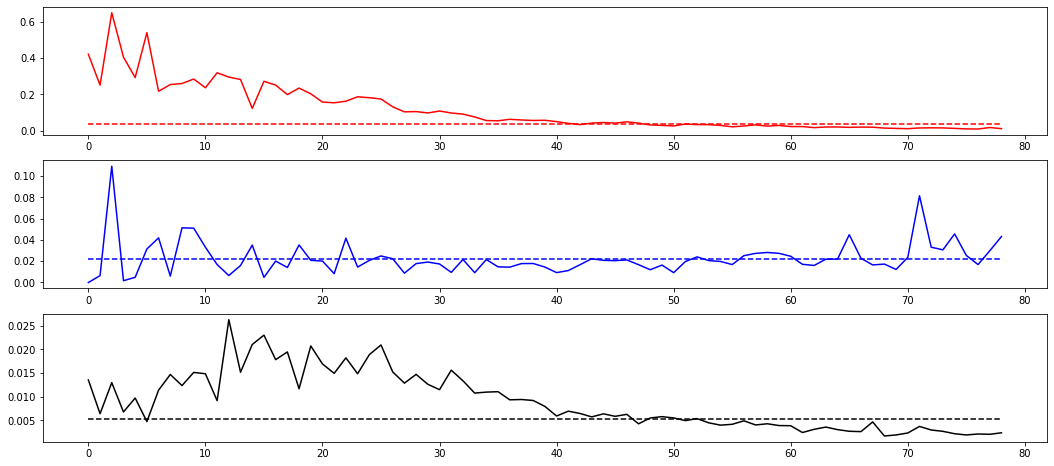

In [12]:

q = .09
betaNonLin = [0, 2]

linVars = sird_fb_delay.getLinVars(infect,recov,dead, q,pop, betaNonLin)

timeVars, figVars, axVars = sird.solveTimeVars(q,pop, infect, recov, dead, graph=True)

print(linVars)

betaTime = sird_fb_delay.calculateBeta(betaNonLin, linVars, q,pop, infect)
axVars[0].plot(betaTime, color="red", linestyle='dashed')
gammaExtended = np.ones(len(timeVars[:,1]))*linVars[-2] #make list of length T for constant line ploting
axVars[1].plot(gammaExtended, color="blue", linestyle='dashed')
nuExtended = np.ones(len(timeVars[:,2]))*linVars[-1] #make list of length T for constant line ploting
axVars[2].plot(nuExtended, color="black", linestyle='dashed')

print(sird_fb_delay.errorFunc(betaNonLin, linVars, q, pop, infect, recov, dead))

In [15]:
qConstraint = (.09, .09) #(.01, 1)
b1Constraint = (0, 5000)
b2Constraint = (1, 10)

varResolution = [1, 1000, 25]
nonLinConstrain = [qConstraint, b1Constraint, b2Constraint]

nonLinVars, linVars = sird_fb_delay.solveAllVars(nonLinConstrain, varResolution, pop, infect, recov, dead)

q = nonLinVars[0]
betaNonLin = nonLinVars[1:]

Solution: 
q:   0.09
b2:  3660.0
b3:  1
b0:  0.034110914646730627
b1:  0.15823243602439965
g:   0.022448121461986197
nu:  0.005241644359216902
cost:  3021851.6192321493



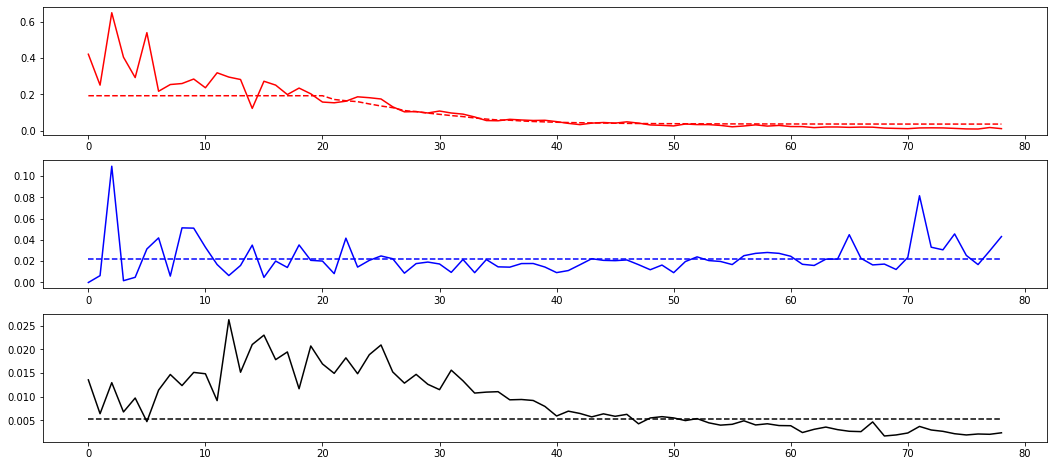

In [17]:
timeVars, figVars, axVars = sird.solveTimeVars(q,pop, infect, recov, dead, graph=True)

betaTime = sird_fb_delay.calculateBeta(betaNonLin, linVars, q,pop, infect)
axVars[0].plot(betaTime, color="red", linestyle='dashed')
gammaExtended = np.ones(len(timeVars[:,1]))*linVars[-2] #make list of length T for constant line ploting
axVars[1].plot(gammaExtended, color="blue", linestyle='dashed')
nuExtended = np.ones(len(timeVars[:,2]))*linVars[-1] #make list of length T for constant line ploting
axVars[2].plot(nuExtended, color="black", linestyle='dashed')